In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

^

Importiamo tutte le librerie che ci serviranno per lo sviluppo della rete neurale

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dividiamo in test e train il dataset di mnist

Gli input sono array che definiscono l'intensità del colore con valori da 0 a 255, per questo motivo dividiamo i valori per 255.0 così da scalarli a valori tra 0 a 1 per calcoli più istantanei.

Poi gli input li trasformiamo in binario sempre per semplificare i calcoli alla macchina

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Appiattisce l'immagine 28x28 in un vettore di 784 valori
    Dense(128, activation='relu'),   # Layer nascosto con 128 neuroni
    Dense(10, activation='softmax')  # Layer di output con 10 neuroni (uno per cifra)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8713 - loss: 0.4648 - val_accuracy: 0.9530 - val_loss: 0.1659
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9607 - loss: 0.1375 - val_accuracy: 0.9668 - val_loss: 0.1203
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9748 - loss: 0.0898 - val_accuracy: 0.9709 - val_loss: 0.0971
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9812 - loss: 0.0642 - val_accuracy: 0.9709 - val_loss: 0.1021
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9856 - loss: 0.0478 - val_accuracy: 0.9726 - val_loss: 0.0993
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9893 - loss: 0.0374 - val_accuracy: 0.9747 - val_loss: 0.0906
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9742 - val_loss: 0.0940
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9937 - loss: 0.0223

Definiamo la struttura del model,
iniziamo usando flatten, esso ci permette di ridurre l'immagine a un vettore di 784 valori binari.

Definiamo i layer, uno per far comprendere al modello la struttura delle immagini con 128 neuroni e un activation type relu, ed il layer finale da 10 neuroni, uno per cifra, con activation type softmax, ideale per la classificazione con probabilità.

Diamo le direttive al modello specificando optimizer, loss sarà categorical_crossenthropy siccome abbiamo usato softmax come attivazione in output.

Infine definiamo l'addestramento.
Il batch size (o "dimensione del batch") è un iperparametro che definisce quanti esempi del dataset vengono processati insieme prima che la rete neurale aggiorni i suoi pesi.

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nAccuracy sul test set: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9702 - loss: 0.1047

Accuracy sul test set: 97.48%


Qui definiamo l'accuratezza del processo per vedere se il modello ha imparato correttamente.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


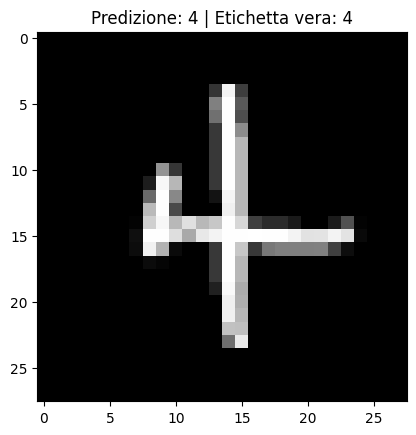

In [22]:
sample_idx = np.random.randint(0, len(X_test))
sample_img = X_test[sample_idx]
prediction = np.argmax(model.predict(sample_img[np.newaxis, ...]))

plt.imshow(sample_img, cmap='gray')
plt.title(f"Predizione: {prediction} | Etichetta vera: {np.argmax(y_test[sample_idx])}")
plt.show()

Finiamo con un predict per vedere se il nostro modello funziona correttamente